1) REGRESSION

In [46]:
!pip install scikit-learn lightgbm matplotlib

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor)
from sklearn.linear_model import (BayesianRidge, ElasticNet, Lasso, LassoLars, LinearRegression, Ridge)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
import lightgbm as lgb
from sklearn.metrics import r2_score



data = pd.read_csv('Fuel_cell_performance_data-Full.csv')

X = data[["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15"]]
y = data["Target3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [48]:

# Initialize regression models
models = {
    'ada': AdaBoostRegressor(),
    'br': BayesianRidge(),
    'dt': DecisionTreeRegressor(),
    'en': ElasticNet(),
    'et': ExtraTreesRegressor(),
    'gbr': GradientBoostingRegressor(),
    'huber': HuberRegressor(),
    'knn': KNeighborsRegressor(),
    'llar': LassoLars(),
    'lasso': Lasso(),
    'lar': LassoLars(),
    'lightgbm': lgb.LGBMRegressor(),
    'lr': LinearRegression(),
    'omp': OrthogonalMatchingPursuit(),
    'par': PassiveAggressiveRegressor(),
    'rf': RandomForestRegressor(),
    'ridge': Ridge(),
}



In [49]:
metrics = {'Model': [], 'R2_Score': [], 'MSE': [], 'RMSE': []}


for model_name, model in models.items():
    model.fit(X_train, y_train)  
    predictions = model.predict(X_test)  
    
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    metrics['Model'].append(model_name)
    metrics['R2_Score'].append(round(r2, 4))
    metrics['MSE'].append(round(mse, 4))
    metrics['RMSE'].append(round(rmse, 4))
    
    data[model_name + '_predictions'] = np.nan  
    data.loc[X_test.index, model_name + '_predictions'] = np.round(predictions, 4)  


data.to_csv('predictions.csv', index=False)

metrics_df = pd.DataFrame(metrics)

metrics_df.to_csv('model_metrics.csv', index=False)


min_rmse_model = metrics_df.loc[metrics_df['RMSE'].idxmin()]


print(f"Model with the least RMSE: {min_rmse_model['Model']}")
print(f"RMSE: {min_rmse_model['RMSE']}")

with open('best_model.txt', 'w') as f:
    f.write(f"Model with the least RMSE: {min_rmse_model['Model']}\n")
    f.write(f"R2: {min_rmse_model['R2_Score']}\n")


c:\Users\devan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3044
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 15
[LightGBM] [Info] Start training from score 68.386286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\devan\AppData\Local\Temp\ipykernel_29760\2384137322.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2_Score', data=metrics_df, palette='viridis')


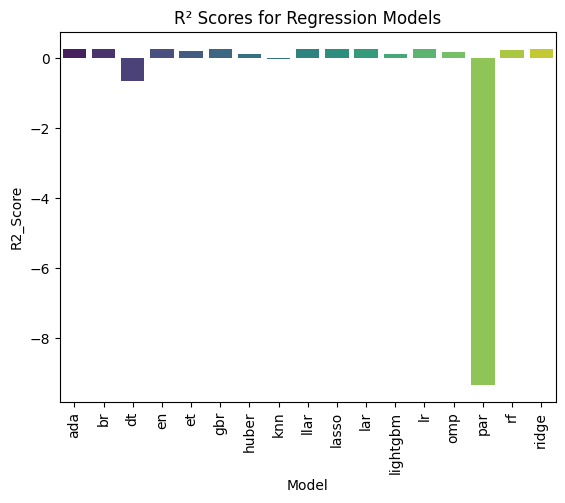

C:\Users\devan\AppData\Local\Temp\ipykernel_29760\2384137322.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='plasma')


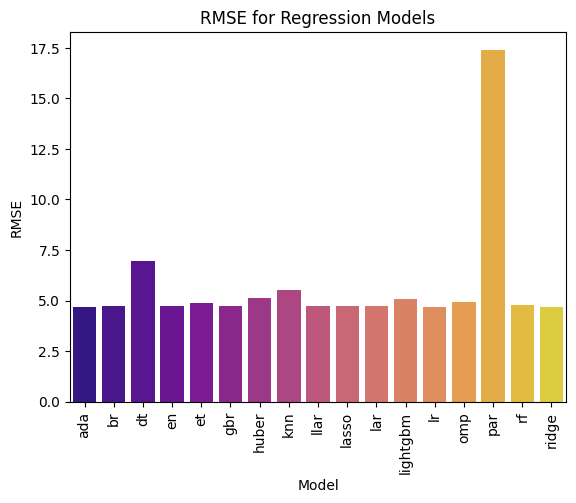

C:\Users\devan\AppData\Local\Temp\ipykernel_29760\2384137322.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df, palette='cividis')


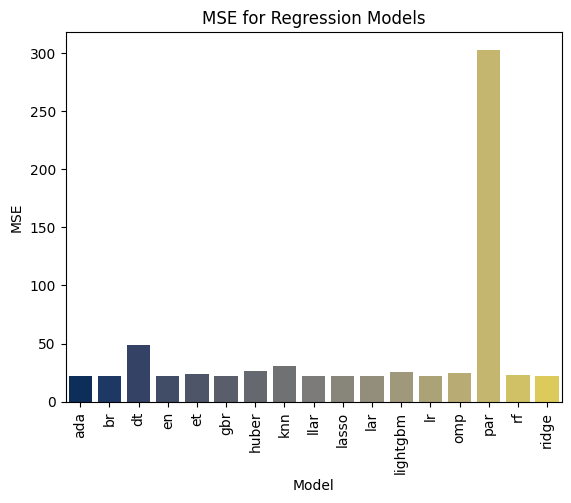

In [50]:


# Plot R² values
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Model', y='R2_Score', data=metrics_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('R² Scores for Regression Models')
plt.show()

# Plot RMSE values
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='plasma')
plt.xticks(rotation=90)
plt.title('RMSE for Regression Models')
plt.show()

# Plot MSE values
sns.barplot(x='Model', y='MSE', data=metrics_df, palette='cividis')
plt.xticks(rotation=90)
plt.title('MSE for Regression Models')
plt.show()


2) CLASSIFICATION

In [51]:

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, MeanShift, KMeans, Birch, DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS



In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)


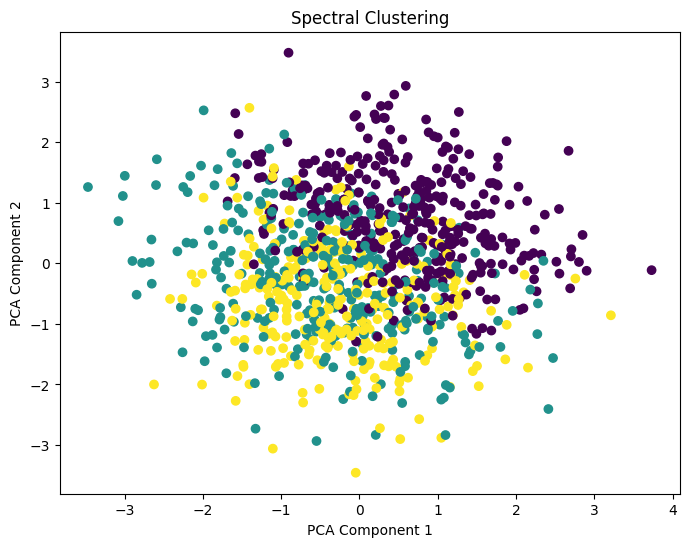

In [53]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_spectral, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


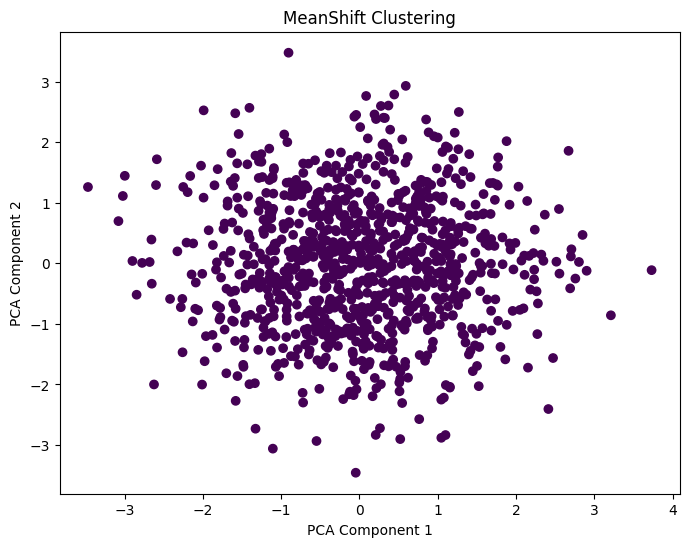

In [54]:
meanshift = MeanShift()
labels_meanshift = meanshift.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_meanshift, cmap='viridis')
plt.title('MeanShift Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


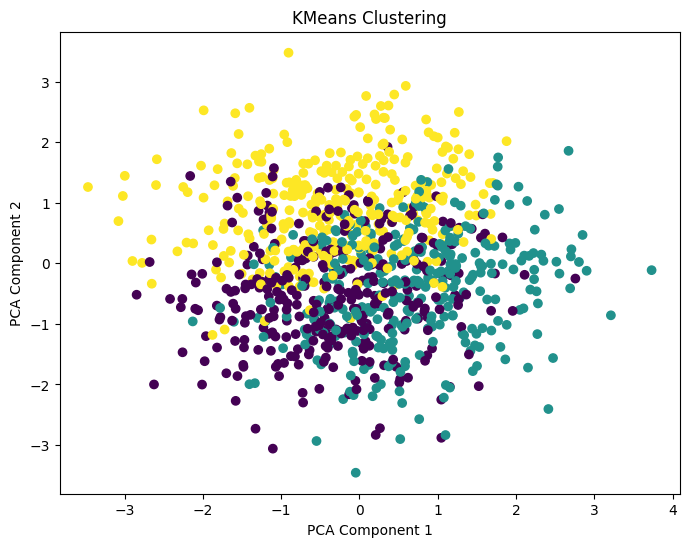

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


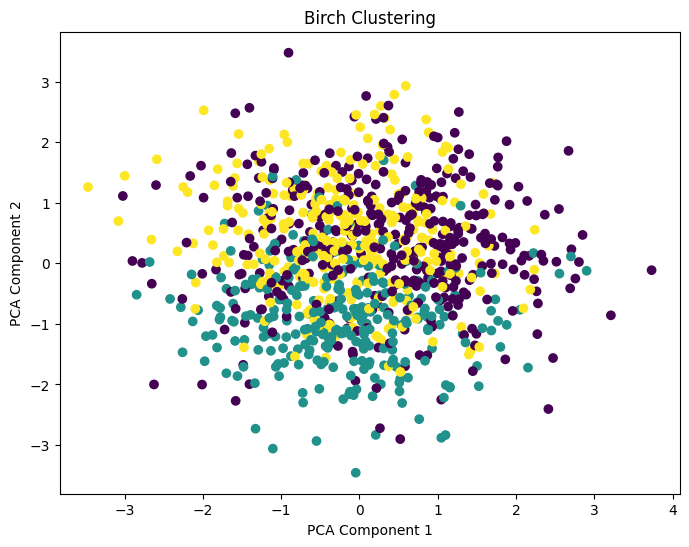

In [56]:
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_birch, cmap='viridis')
plt.title('Birch Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


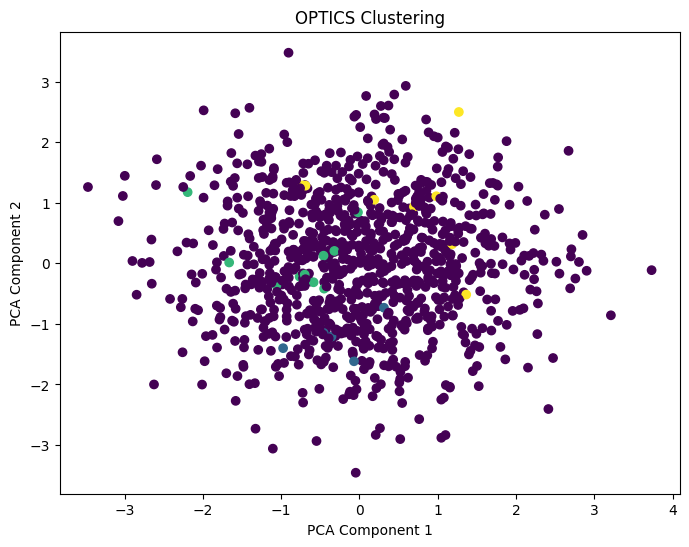

In [57]:
optics = OPTICS(min_samples=5)
labels_optics = optics.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optics, cmap='viridis')
plt.title('OPTICS Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


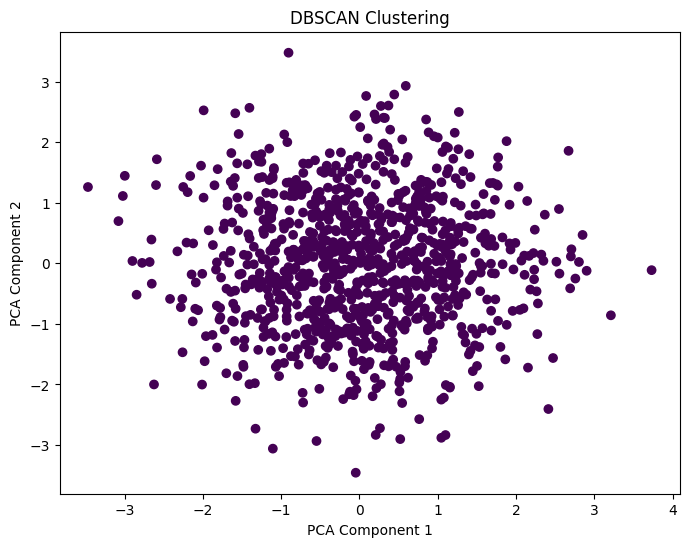

In [58]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


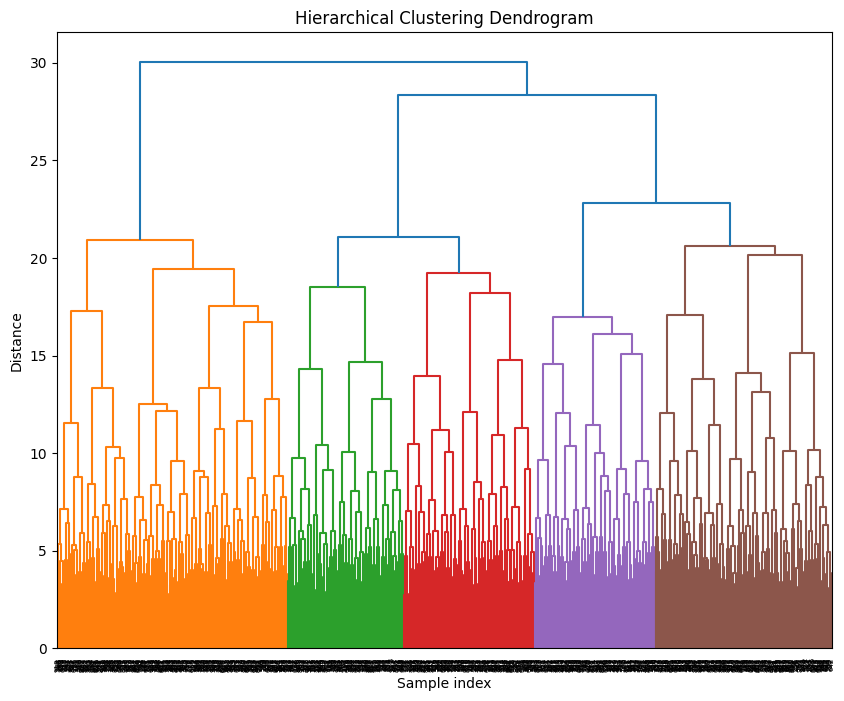

In [59]:
Z = linkage(X_scaled, 'ward')

labels_hclust = fcluster(Z, t=0.5, criterion='distance')



plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [60]:
data['Spectral_Labels'] = labels_spectral
data['MeanShift_Labels'] = labels_meanshift
data['KMeans_Labels'] = labels_kmeans
data['Birch_Labels'] = labels_birch
data['OPTICS_Labels'] = labels_optics
data['DBSCAN_Labels'] = labels_dbscan
data['Hierarchical_Labels'] = labels_hclust
data.to_csv('clustering_results.csv', index=False)

data.head()

print("Clustering results saved in csv file")



Clustering results saved in csv file
